In [1]:
!python --version

Python 3.7.12


In [2]:
pip install tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 2.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.4
    Uninstalling tensorflow-2.6.4:
      Successfully uninstalled tensorflow-2.6.4
ERROR: pip's dependency resolver does not currently tak

In [3]:
pip install tensorflow-quantum==0.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.6 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 202.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:00:00:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.8/641.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 24.3 MB/s eta 0:0

In [4]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_quantum as tfq
from tensorflow import keras
import cirq
import sympy
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

import os
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import collections
from cirq.contrib.svg import SVGCircuit

from sklearn.model_selection import train_test_split

import collections

In [5]:
# Menyiapkan list kosong untuk menyimpan data dan label
data = []
labels = []
# Mendefinisikan kategori dan path direktori
categories = ['glioma','meningioma', 'no_tumor', 'pituitary']
base_path = '/kaggle/input/brain-mri-ta-ugi-revised/Dataset/Merge'

# Looping melalui kategori
for category in categories:
    path = os.path.join(base_path, category)
    class_num = categories.index(category)  # Mengonversi label ke angka jika diperlukan

    # Looping melalui file gambar
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Membaca gambar dengan OpenCV
        image_array = cv2.resize(image_array, (12, 12))  # Mengubah ukuran gambar jika diperlukan
        data.append(image_array)
        labels.append(class_num)

# Mengubah data menjadi array NumPy
data = np.array(data)
label = np.array(labels)

In [6]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Menampilkan dimensi data
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (2611, 12, 12, 3)
Dimensi X_test: (653, 12, 12, 3)
Dimensi y_train: (2611,)
Dimensi y_test: (653,)


In [7]:
# Distribusi kelas pada data train
print("Distribusi kelas pada data train:")
print(np.bincount(y_train))

# Distribusi kelas pada data test
print("\nDistribusi kelas pada data test:")
print(np.bincount(y_test))
# ['glioma','meningioma', 'no_tumor', 'pituitary']

Distribusi kelas pada data train:
[712 755 416 728]

Distribusi kelas pada data test:
[214 182  84 173]


In [8]:
# Periksa dimensi array X_train
print(X_train.ndim)
print(X_test.ndim)

4
4


In [9]:
X_train = np.mean(X_train, axis=-1, keepdims=True)
X_test = np.mean(X_test, axis=-1, keepdims=True)

In [10]:
# Menampilkan dimensi data
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (2611, 12, 12, 1)
Dimensi X_test: (653, 12, 12, 1)
Dimensi y_train: (2611,)
Dimensi y_test: (653,)


# Mulai

In [11]:
import tensorflow as tf
import numpy as np
import sympy
import cirq
import tensorflow_quantum as tfq
from tensorflow import keras

class QConv(tf.keras.layers.Layer):
    def __init__(self, filter_size, depth, activation=None, name=None, kernel_regularizer=None, **kwargs):
        super(QConv, self).__init__(name=name, **kwargs)
        self.filter_size = filter_size
        self.depth = depth
        self.learning_params = []
        self.QCNN_layer_gen()
        self.activation = tf.keras.layers.Activation(activation)
        self.kernel_regularizer = kernel_regularizer

    def _get_new_param(self):
        new_param = sympy.symbols('p'+str(len(self.learning_params)))
        self.learning_params.append(new_param)
        return new_param

    def _QConv(self, step, target, qubits):
        yield cirq.CZPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
        yield cirq.CXPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])

    def QCNN_layer_gen(self):
        pixels = self.filter_size**2
        cirq_qubits = cirq.GridQubit.rect(self.filter_size, self.filter_size)
        input_circuit = cirq.Circuit()
        input_params = [sympy.symbols('a%d' %i) for i in range(pixels)]
        for i, qubit in enumerate(cirq_qubits):
            input_circuit.append(cirq.rx(np.pi*input_params[i])(qubit))

        QCNN_circuit = cirq.Circuit()
        step_size = [2**i for i in range(np.log2(pixels).astype(np.int32))]
        for step in step_size:
            for target in range(0, pixels, 2*step):
                QCNN_circuit.append(self._QConv(step, target, cirq_qubits))

        full_circuit = cirq.Circuit()
        full_circuit.append(input_circuit)
        full_circuit.append(QCNN_circuit)
        self.circuit = full_circuit
        self.params = input_params + self.learning_params
        self.op = cirq.Z(cirq_qubits[0])

    def build(self, input_shape):
        self.width = input_shape[1]
        self.height = input_shape[2]
        self.channel = input_shape[3]
        self.num_x = self.width - self.filter_size + 1
        self.num_y = self.height - self.filter_size + 1
        self.kernel = self.add_weight(name='kernal',
                                      shape=[self.depth, self.channel, len(self.learning_params)],
                                      initializer=tf.keras.initializers.glorot_normal(),
                                      regularizer=self.kernel_regularizer)
        self.circuit_tensor = tfq.convert_to_tensor([self.circuit] * self.num_x * self.num_y * self.channel)

    def call(self, inputs):
        stack_set = None
        for i in range(self.num_x):
            for j in range(self.num_y):
                slice_part = tf.slice(inputs, [0, i, j, 0], [-1, self.filter_size, self.filter_size, -1])
                slice_part = tf.reshape(slice_part, shape=[-1, 1, self.filter_size, self.filter_size, self.channel])
                if stack_set is None:
                    stack_set = slice_part
                else:
                    stack_set = tf.concat([stack_set, slice_part], 1)
        stack_set = tf.transpose(stack_set, perm=[0, 1, 4, 2, 3])
        stack_set = tf.reshape(stack_set, shape=[-1, self.filter_size**2])
        circuit_inputs = tf.tile([self.circuit_tensor], [tf.shape(inputs)[0], 1])
        circuit_inputs = tf.reshape(circuit_inputs, shape=[-1])
        tf.fill([tf.shape(inputs)[0]*self.num_x*self.num_y, 1], 1)
        outputs = []
        for i in range(self.depth):
            controller = tf.tile(self.kernel[i], [tf.shape(inputs)[0]*self.num_x*self.num_y, 1])
            outputs.append(self.single_depth_QCNN(stack_set, controller, circuit_inputs))
        output_tensor = tf.stack(outputs, axis=3)
        output_tensor = tf.math.acos(tf.clip_by_value(output_tensor, -1+1e-5, 1-1e-5)) / np.pi
        return self.activation(output_tensor)

    def single_depth_QCNN(self, input_data, controller, circuit_inputs):
        with tf.device('/device:GPU:0'):
            input_data = tf.concat([input_data, controller], 1)
            QCNN_output = tfq.layers.Expectation()(circuit_inputs,
                                                    symbol_names=self.params,
                                                    symbol_values=input_data,
                                                    operators=self.op)
            QCNN_output = tf.reshape(QCNN_output, shape=[-1, self.num_x, self.num_y, self.channel])
            return tf.math.reduce_sum(QCNN_output, 3)

    def __str__(self):
        return self.circuit.to_text_diagram()

    def show_circuit(self):
        print(self.circuit)

    def get_config(self):
        config = super().get_config()
        config.update({
            'filter_size': self.filter_size,
            'depth': self.depth,
            'activation': keras.activations.serialize(self.activation),
            'kernel_regularizer': keras.regularizers.serialize(self.kernel_regularizer),
        })
        return config


In [12]:
#Defining the varaibles to intitalize the QCNN
width = np.shape(X_train)[1]
height = np.shape(X_train)[2]

Model 1

In [13]:
#Initializing the model
qcnn_model = models.Sequential()
#The QCNN!!!!!
qcnn_model.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
#So we can pase it to linear layers
qcnn_model.add(layers.Flatten())
qcnn_model.add(layers.Dense(32, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model.add(layers.Dense(4, activation='softmax'))

qcnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 qconv1 (QConv)              (None, 11, 11, 4)         24        
                                                                 
 flatten (Flatten)           (None, 484)               0         
                                                                 
 dense (Dense)               (None, 32)                15520     
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 15,676
Trainable params: 15,676
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history = qcnn_model.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         epochs=10)

Epoch 1/10
82/82 [==============================] - 170s 2s/step - loss: 1.3378 - accuracy: 0.3799 - val_loss: 1.2798 - val_accuracy: 0.4211
Epoch 2/10
82/82 [==============================] - 165s 2s/step - loss: 1.1810 - accuracy: 0.4845 - val_loss: 1.1911 - val_accuracy: 0.4855
Epoch 3/10
82/82 [==============================] - 167s 2s/step - loss: 1.1023 - accuracy: 0.5358 - val_loss: 1.1536 - val_accuracy: 0.4900
Epoch 4/10
82/82 [==============================] - 166s 2s/step - loss: 1.0441 - accuracy: 0.5573 - val_loss: 1.1597 - val_accuracy: 0.4916
Epoch 5/10
82/82 [==============================] - 163s 2s/step - loss: 0.9925 - accuracy: 0.5925 - val_loss: 1.1230 - val_accuracy: 0.4992
Epoch 6/10
82/82 [==============================] - 160s 2s/step - loss: 0.9441 - accuracy: 0.6162 - val_loss: 1.1309 - val_accuracy: 0.4885
Epoch 7/10
82/82 [==============================] - 159s 2s/step - loss: 0.9039 - accuracy: 0.6362 - val_loss: 1.1251 - val_accuracy: 0.5023
Epoch 8/10
82

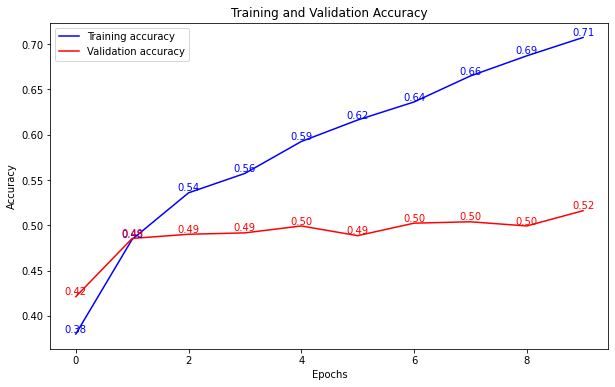

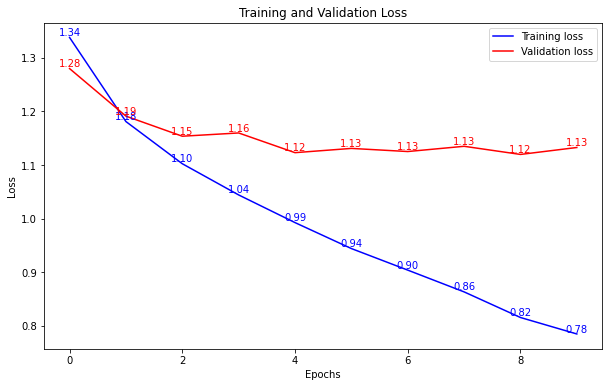

In [16]:
accuracy = qcnn_history.history['accuracy']
val_accuracy = qcnn_history.history['val_accuracy']

loss = qcnn_history.history['loss']
val_loss = qcnn_history.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = qcnn_model.predict(X_test)

# Mengubah prediksi menjadi kelas yang sesuai (kelas dengan nilai probabilitas tertinggi)
predicted_classes = np.argmax(predictions, axis=1)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65       214
           1       0.45      0.54      0.49       182
           2       0.46      0.32      0.38        84
           3       0.42      0.54      0.47       173

    accuracy                           0.52       653
   macro avg       0.53      0.49      0.50       653
weighted avg       0.55      0.52      0.52       653



In [19]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[118  44  12  40]
 [ 14  98  12  58]
 [  5  20  27  32]
 [ 14  57   8  94]]


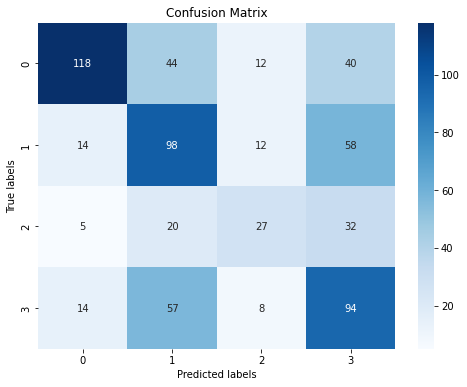

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from IPython.display import FileLink

qcnn_model.save('brain_tumor_qcnn_1layer_multiclass.h5')

FileLink('brain_tumor_qcnn_1layer_multiclass.h5')

/kaggle/working/brain_tumor_qcnn_1layer_multiclass.h5

# With Oversampling

In [21]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_flat = X_train.reshape(X_train.shape[0], -1)

# Menampilkan jumlah sampel dalam masing-masing kelas sebelum oversampling
print("Jumlah sampel kelas positif_tumor sebelum kelas 0:", len(y_train[y_train == 0]))
print("Jumlah sampel kelas negatif_tumor sebelum kelas 1:", len(y_train[y_train == 1]))
print("Jumlah sampel kelas positif_tumor sebelum kelas 2:", len(y_train[y_train == 2]))
print("Jumlah sampel kelas negatif_tumor sebelum kelas 3:", len(y_train[y_train == 3]))

# Menerapkan RandomOverSampler untuk oversampling pada kelas minoritas
oversampler = RandomOverSampler(sampling_strategy='all')
X_resampled, y_resampled = oversampler.fit_resample(X_flat, y_train)

# Menampilkan jumlah sampel dalam masing-masing kelas setelah oversampling
print("\nJumlah sampel kelas positif_tumor setelah oversampling kelas 0:", len(y_resampled[y_resampled == 0]))
print("\nJumlah sampel kelas positif_tumor setelah oversampling kelas 1:", len(y_resampled[y_resampled == 1]))
print("\nJumlah sampel kelas positif_tumor setelah oversampling kelas 2:", len(y_resampled[y_resampled == 2]))
print("\nJumlah sampel kelas positif_tumor setelah oversampling kelas 3:", len(y_resampled[y_resampled == 3]))

# Kembalikan dimensi X_train ke bentuk (n_samples, height, width, channels)
X_resampled = X_resampled.reshape(X_resampled.shape[0], 12, 12, 1)
X_test = X_test.reshape(X_test.shape[0], 12, 12, 1)

# Menampilkan dimensi X_train setelah reshape kembali
print("\nDimensi X_train setelah reshape kembali:", X_resampled.shape)

Jumlah sampel kelas positif_tumor sebelum kelas 0: 712
Jumlah sampel kelas negatif_tumor sebelum kelas 1: 755
Jumlah sampel kelas positif_tumor sebelum kelas 2: 416
Jumlah sampel kelas negatif_tumor sebelum kelas 3: 728

Jumlah sampel kelas positif_tumor setelah oversampling kelas 0: 755

Jumlah sampel kelas positif_tumor setelah oversampling kelas 1: 755

Jumlah sampel kelas positif_tumor setelah oversampling kelas 2: 755

Jumlah sampel kelas positif_tumor setelah oversampling kelas 3: 755

Dimensi X_train setelah reshape kembali: (3020, 12, 12, 1)


In [22]:
#Initializing the model
qcnn_model2 = models.Sequential()
#The QCNN!!!!!
qcnn_model2.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
#So we can pase it to linear layers
qcnn_model2.add(layers.Flatten())
qcnn_model2.add(layers.Dense(128, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model2.add(layers.Dense(4, activation='softmax'))
qcnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 qconv1 (QConv)              (None, 11, 11, 4)         24        
                                                                 
 flatten_1 (Flatten)         (None, 484)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               62080     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 62,620
Trainable params: 62,620
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history2 = qcnn_model2.fit(X_resampled, y_resampled,
                         validation_data=(X_test, y_test),
                         epochs=10)

Epoch 1/10
95/95 [==============================] - 195s 2s/step - loss: 1.3021 - accuracy: 0.3848 - val_loss: 1.2475 - val_accuracy: 0.4196
Epoch 2/10
95/95 [==============================] - 196s 2s/step - loss: 1.0844 - accuracy: 0.5417 - val_loss: 1.1407 - val_accuracy: 0.4809
Epoch 3/10
95/95 [==============================] - 195s 2s/step - loss: 0.9626 - accuracy: 0.6192 - val_loss: 1.1628 - val_accuracy: 0.4870
Epoch 4/10
95/95 [==============================] - 192s 2s/step - loss: 0.8494 - accuracy: 0.6672 - val_loss: 1.1464 - val_accuracy: 0.5069
Epoch 5/10
95/95 [==============================] - 195s 2s/step - loss: 0.7523 - accuracy: 0.7209 - val_loss: 1.0803 - val_accuracy: 0.5559
Epoch 6/10
95/95 [==============================] - 192s 2s/step - loss: 0.6403 - accuracy: 0.7825 - val_loss: 1.0970 - val_accuracy: 0.5574
Epoch 7/10
95/95 [==============================] - 190s 2s/step - loss: 0.5518 - accuracy: 0.8192 - val_loss: 1.0607 - val_accuracy: 0.5758
Epoch 8/10
95

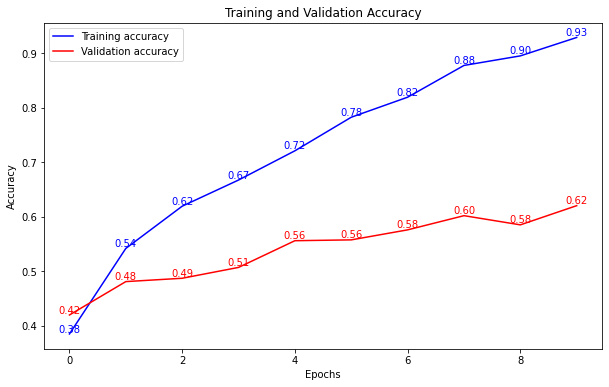

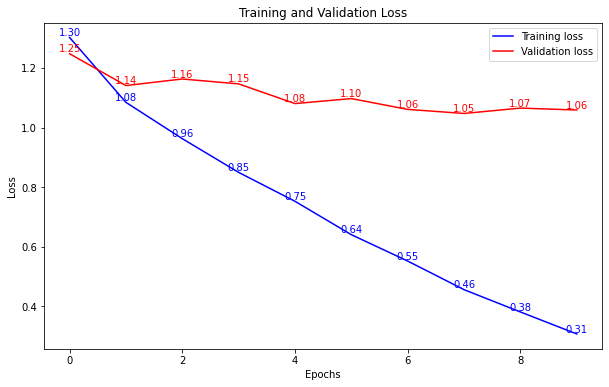

In [25]:
accuracy = qcnn_history2.history['accuracy']
val_accuracy = qcnn_history2.history['val_accuracy']

loss = qcnn_history2.history['loss']
val_loss = qcnn_history2.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = qcnn_model2.predict(X_test)

# Mengubah prediksi menjadi kelas yang sesuai (kelas dengan nilai probabilitas tertinggi)
predicted_classes = np.argmax(predictions, axis=1)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       214
           1       0.52      0.62      0.56       182
           2       0.75      0.62      0.68        84
           3       0.57      0.62      0.59       173

    accuracy                           0.62       653
   macro avg       0.65      0.62      0.63       653
weighted avg       0.64      0.62      0.62       653



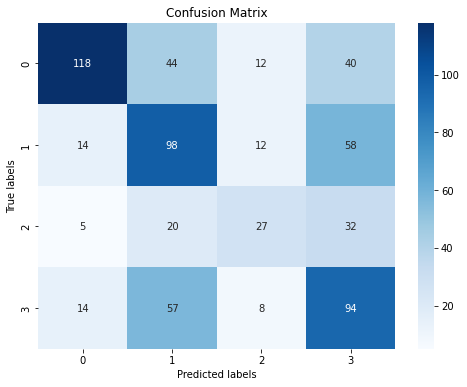

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from IPython.display import FileLink

qcnn_model2.save('brain_tumor_qcnn_1layer_multiclass_oversampling.h5')

FileLink('brain_tumor_qcnn_1layer_multiclass_oversampling.h5')

/kaggle/working/brain_tumor_qcnn_1layer_multiclass_oversampling.h5

2 Layer

In [39]:
#Initializing the model
qcnn_model3 = models.Sequential()
#The QCNN!!!!!
qcnn_model3.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 1)))
qcnn_model3.add(QConv(filter_size=2, depth=8, activation='relu', name='qconv2'))
#So we can pase it to linear layers
qcnn_model3.add(layers.Flatten())
qcnn_model3.add(layers.Dense(128, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model3.add(layers.Dense(4, activation='softmax'))
qcnn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 qconv1 (QConv)              (None, 11, 11, 4)         24        
                                                                 
 qconv2 (QConv)              (None, 10, 10, 8)         192       
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               102528    
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 103,260
Trainable params: 103,260
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Getting ready to train (optimizer, loss, metrics)
qcnn_model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
qcnn_history3 = qcnn_model3.fit(X_resampled, y_resampled,
                         validation_data=(X_test, y_test),
                         epochs=10)

Epoch 1/10
91/95 [===========================>..] - ETA: 1:02 - loss: 1.3245 - accuracy: 0.3905

In [ ]:
accuracy = qcnn_history3.history['accuracy']
val_accuracy = qcnn_history3.history['val_accuracy']

loss = qcnn_history3.history['loss']
val_loss = qcnn_history3.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = qcnn_model3.predict(X_test)

# Mengubah prediksi menjadi kelas yang sesuai (kelas dengan nilai probabilitas tertinggi)
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Lanjutan 1 layer

In [33]:
#Train it!!! (Taking out validation accuracy during training because takes too long) 4x4
history_lanjutan = qcnn_model2.fit(X_resampled, y_resampled,
                         validation_data=(X_test, y_test),
                         epochs=40)

Epoch 1/40
95/95 [==============================] - 188s 2s/step - loss: 0.2493 - accuracy: 0.9503 - val_loss: 1.0746 - val_accuracy: 0.6003
Epoch 2/40
95/95 [==============================] - 189s 2s/step - loss: 0.1907 - accuracy: 0.9715 - val_loss: 1.1362 - val_accuracy: 0.5972
Epoch 3/40
95/95 [==============================] - 193s 2s/step - loss: 0.1592 - accuracy: 0.9805 - val_loss: 1.1495 - val_accuracy: 0.6064
Epoch 4/40
95/95 [==============================] - 191s 2s/step - loss: 0.1248 - accuracy: 0.9904 - val_loss: 1.1420 - val_accuracy: 0.6034
Epoch 5/40
95/95 [==============================] - 190s 2s/step - loss: 0.1002 - accuracy: 0.9957 - val_loss: 1.1614 - val_accuracy: 0.6003
Epoch 6/40
95/95 [==============================] - 189s 2s/step - loss: 0.0778 - accuracy: 0.9983 - val_loss: 1.2390 - val_accuracy: 0.5835
Epoch 7/40
95/95 [==============================] - 189s 2s/step - loss: 0.0634 - accuracy: 0.9997 - val_loss: 1.2529 - val_accuracy: 0.6003
Epoch 8/40
95

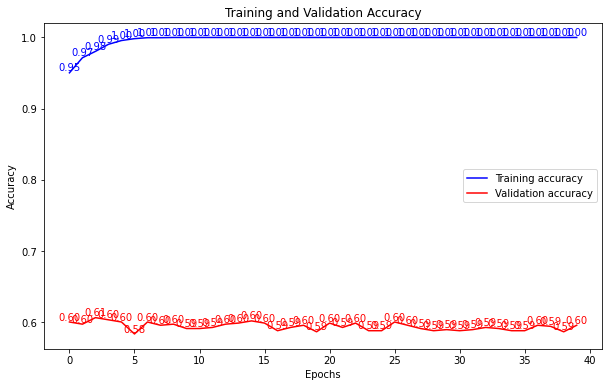

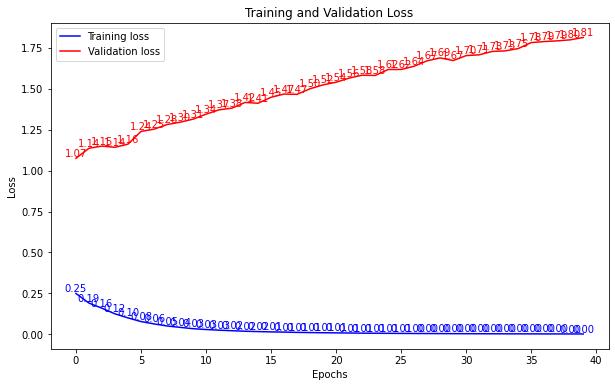

In [34]:
accuracy = history_lanjutan.history['accuracy']
val_accuracy = history_lanjutan.history['val_accuracy']

loss = history_lanjutan.history['loss']
val_loss = history_lanjutan.history['val_loss']

epochs = range(len(accuracy))

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Menambahkan nilai di setiap titik
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_acc in enumerate(val_accuracy):
    plt.text(i, val_acc, f'{val_acc:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Perbesar ukuran gambar
plt.figure(figsize=(10, 6))

# Plot grafik training dan validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

# Menambahkan nilai di setiap titik
for i, ls in enumerate(loss):
    plt.text(i, ls, f'{ls:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
for i, val_ls in enumerate(val_loss):
    plt.text(i, val_ls, f'{val_ls:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = qcnn_model2.predict(X_test)

# Mengubah prediksi menjadi kelas yang sesuai (kelas dengan nilai probabilitas tertinggi)
predicted_classes = np.argmax(predictions, axis=1)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       214
           1       0.51      0.59      0.55       182
           2       0.62      0.65      0.64        84
           3       0.54      0.57      0.56       173

    accuracy                           0.60       653
   macro avg       0.60      0.60      0.60       653
weighted avg       0.61      0.60      0.60       653



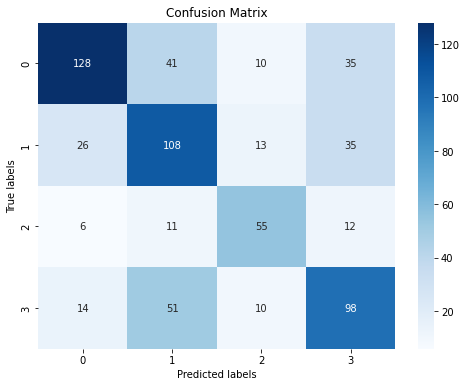

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from IPython.display import FileLink

qcnn_model2.save('brain_tumor_qcnn_1layer_multiclass_oversampling_lanjutan.h5')

FileLink('brain_tumor_qcnn_1layer_multiclass_oversampling_lanjutan.h5')

/kaggle/working/brain_tumor_qcnn_1layer_multiclass_oversampling_lanjutan.h5